In [257]:
#import your libraries

In [258]:
import pandas as pd

In [259]:
import seaborn as sns

In [260]:
import matplotlib.pyplot as plt

In [261]:
import numpy as np

In [262]:
import math

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
from sklearn.preprocessing import StandardScaler

In [265]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
from sklearn.metrics import mean_absolute_error as mae

In [268]:
#Data importation

In [269]:
sale= pd.read_csv(r'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212400513/sales.csv')

In [270]:
sale.columns

Index(['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [271]:
sale.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [272]:
sale.drop(['Unnamed: 0'], axis=1, inplace=True)

In [274]:
sale.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [275]:
temp_df=pd.read_csv(r'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212467098/sensor_storage_temperature.csv')

In [276]:
temp_df.drop(columns=['Unnamed: 0'],axis=1, inplace=True,)

In [277]:
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [278]:
temp_df.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


In [279]:
stock_df=pd.read_csv(r'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652212438184/sensor_stock_levels.csv')

In [280]:
stock_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [281]:
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [282]:
stock_df.describe()

,estimated_stock_pct
count,15000.000000
mean,0.502735
std,0.286842
min,0.010000
25%,0.260000
50%,0.500000
75%,0.750000
max,1.000000


In [283]:
#Creating Dummy for the Date

In [284]:
def Date_model (data:pd.DataFrame=None, column: str=None):
    dummy=data.copy()
    dummy[column]=pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy

In [285]:
sale=Date_model(sale,'timestamp')

In [286]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [287]:
temp_df=Date_model(temp_df,'timestamp')

In [288]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.1+ KB


In [289]:
stock_df=Date_model(stock_df, 'timestamp')

In [290]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [291]:
from datetime import datetime

In [292]:
#Data featureing

In [294]:
def Date_hourly(data, column):
    dummy=data.copy()
    new_da= dummy[column].tolist()
    new_da= [i.strftime('%Y-%m-%d %H:00:00')for i in new_da]
    new_da=[datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_da]
    dummy[column]=new_da
    return dummy

In [295]:
Date_hourly(sale, 'timestamp')

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:00:00,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:00:00,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:00,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:00:00,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [296]:
Date_hourly(stock_df,'timestamp')

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22
...,...,...,...,...
14995,b9bf6788-09f3-490b-959b-dc5b55edb4b6,2022-03-04 10:00:00,e37658de-3649-4ddb-9c73-b868dd69d3fe,0.66
14996,9ff1cc01-020f-491a-bafd-13552dccff44,2022-03-02 12:00:00,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.99
14997,4d8101de-e8a2-4af9-9764-7a3a22aa7084,2022-03-03 17:00:00,8e21dcec-d775-4969-8334-05a37a5fd189,0.72
14998,5f2a7b1e-b3c4-4395-8425-c960e22f701d,2022-03-02 19:00:00,9708cf5b-aa69-4320-a013-9d234c40e63f,0.95


In [297]:
Date_hourly(temp_df, 'timestamp')

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38
...,...,...,...
23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:00:00,-1.46
23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:00:00,-19.37
23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:00:00,-2.89
23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:00:00,-2.56


In [298]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [299]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [300]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.1+ KB


In [301]:
sale_agg=sale.groupby(['timestamp','product_id']).agg({'quantity' : 'sum'}).reset_index()

In [302]:
sale_agg

,timestamp,product_id,quantity
0,2022-03-01 09:00:13,9e71fa82-7be2-4320-abd6-f8bc65b41913,3
1,2022-03-01 09:00:18,049b2171-0eeb-4a3e-bf98-0c290c7821da,3
2,2022-03-01 09:00:28,04da844d-8dba-4470-9119-e534d52a03a0,4
3,2022-03-01 09:00:42,6232cdff-0954-496a-b645-09c79abbd6e0,1
4,2022-03-01 09:01:06,6fdec15b-fd57-4920-a84f-211532cbe46a,4
...,...,...,...
7824,2022-03-07 19:58:00,a614b853-9138-41fa-a268-e5753a63757d,2
7825,2022-03-07 19:58:54,1cf0b205-85d0-4f17-86e7-5f4a3b309f5e,3
7826,2022-03-07 19:59:09,79eab594-7c8c-4868-af6d-3bf0996b5010,3
7827,2022-03-07 19:59:50,be657df2-49cd-44fb-852e-7204b6c2c5ba,1


In [303]:
stock_agg=stock_df.groupby(['timestamp','product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()

In [304]:
stock_agg

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57
...,...,...,...
14993,2022-03-07 19:58:18,6370633a-ac41-42a1-a29e-56c14d63786f,0.63
14994,2022-03-07 19:58:18,83c88e75-20c2-45b1-be9d-6cb808707dfb,0.54
14995,2022-03-07 19:58:35,c6ffd15f-c133-47a2-93e5-828eb4ad3e26,0.37
14996,2022-03-07 19:59:22,7f6922e9-b858-41c6-8765-9750bc5e8a86,0.60


In [305]:
temp_agg=temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()

In [306]:
temp_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    23890 non-null  datetime64[ns]
 1   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 373.4 KB


In [307]:
merge_df=stock_agg.merge(sale_agg, on=['timestamp', 'product_id'], how='left')

In [308]:
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN


In [309]:
merge_df=merge_df.merge(temp_agg, on='timestamp', how='left')

In [310]:
merge_df.isnull().sum()

timestamp                  0
product_id                 0
estimated_stock_pct        0
quantity               14998
temperature            13698
dtype: int64

In [311]:
product_sale=sale[['product_id','category']]

In [312]:
product_sale=sale[['product_id','category']].drop_duplicates()

In [313]:
merge_df=merge_df.merge(product_sale, on="product_id", how='left')

In [314]:
merge_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN,spices and herbs
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN,baked goods
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,1.85,canned foods
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN,canned foods
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN,cheese
...,...,...,...,...,...,...
14993,2022-03-07 19:58:18,6370633a-ac41-42a1-a29e-56c14d63786f,0.63,NaN,NaN,vegetables
14994,2022-03-07 19:58:18,83c88e75-20c2-45b1-be9d-6cb808707dfb,0.54,NaN,NaN,spices and herbs
14995,2022-03-07 19:58:35,c6ffd15f-c133-47a2-93e5-828eb4ad3e26,0.37,NaN,NaN,vegetables
14996,2022-03-07 19:59:22,7f6922e9-b858-41c6-8765-9750bc5e8a86,0.60,NaN,NaN,refrigerated items


In [315]:
product_unit=sale[['product_id','unit_price']]

In [316]:
product_unit=sale[['product_id','unit_price']].drop_duplicates()

In [317]:
merge_df=merge_df.merge(product_unit, on="product_id", how="left")

In [318]:
merge_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,NaN,NaN,spices and herbs,2.19
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,NaN,NaN,baked goods,8.49
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,NaN,1.85,canned foods,8.99
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,NaN,NaN,canned foods,7.49
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,NaN,NaN,cheese,13.99
...,...,...,...,...,...,...,...
14993,2022-03-07 19:58:18,6370633a-ac41-42a1-a29e-56c14d63786f,0.63,NaN,NaN,vegetables,2.49
14994,2022-03-07 19:58:18,83c88e75-20c2-45b1-be9d-6cb808707dfb,0.54,NaN,NaN,spices and herbs,4.19
14995,2022-03-07 19:58:35,c6ffd15f-c133-47a2-93e5-828eb4ad3e26,0.37,NaN,NaN,vegetables,1.19
14996,2022-03-07 19:59:22,7f6922e9-b858-41c6-8765-9750bc5e8a86,0.60,NaN,NaN,refrigerated items,5.99


In [319]:
merge_df['quantity']=merge_df['quantity'].fillna(0)

In [320]:
merge_df['temperature']=merge_df['temperature'].fillna(0)

In [321]:
merge_df.isnull().sum()

timestamp              0
product_id             0
estimated_stock_pct    0
quantity               0
temperature            0
category               0
unit_price             0
dtype: int64

In [322]:
merge_df['timestamp_to_day']=merge_df['timestamp'].dt.day

In [323]:
merge_df['timestamp_to_week']=merge_df['timestamp'].dt.dayofweek

In [324]:
merge_df['timestamp_to_hours']=merge_df['timestamp'].dt.hour

In [325]:
merge_df.drop(['timestamp'], axis=1, inplace=True)

In [326]:
merge_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_to_day,timestamp_to_week,timestamp_to_hours
0,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,0.00,spices and herbs,2.19,1,1,9
1,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,0.00,baked goods,8.49,1,1,9
2,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,1.85,canned foods,8.99,1,1,9
3,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,0.00,canned foods,7.49,1,1,9
4,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,0.00,cheese,13.99,1,1,9


In [327]:
merge_df=pd.get_dummies(merge_df, columns=['category'])

In [328]:
dummy_columns = merge_df.filter(like='category_').columns

In [329]:
merge_df[dummy_columns] = merge_df[dummy_columns].astype(int)

In [330]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      14998 non-null  object 
 1   estimated_stock_pct             14998 non-null  float64
 2   quantity                        14998 non-null  float64
 3   temperature                     14998 non-null  float64
 4   unit_price                      14998 non-null  float64
 5   timestamp_to_day                14998 non-null  int32  
 6   timestamp_to_week               14998 non-null  int32  
 7   timestamp_to_hours              14998 non-null  int32  
 8   category_baby products          14998 non-null  int32  
 9   category_baked goods            14998 non-null  int32  
 10  category_baking                 14998 non-null  int32  
 11  category_beverages              14998 non-null  int32  
 12  category_canned foods           

In [331]:
merge_df.drop(['product_id'], inplace=True, axis=1)

In [332]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estimated_stock_pct             14998 non-null  float64
 1   quantity                        14998 non-null  float64
 2   temperature                     14998 non-null  float64
 3   unit_price                      14998 non-null  float64
 4   timestamp_to_day                14998 non-null  int32  
 5   timestamp_to_week               14998 non-null  int32  
 6   timestamp_to_hours              14998 non-null  int32  
 7   category_baby products          14998 non-null  int32  
 8   category_baked goods            14998 non-null  int32  
 9   category_baking                 14998 non-null  int32  
 10  category_beverages              14998 non-null  int32  
 11  category_canned foods           14998 non-null  int32  
 12  category_cheese                 

In [333]:
x=merge_df.drop(['estimated_stock_pct'],axis=1)

In [334]:
y=merge_df['estimated_stock_pct']

In [335]:
from sklearn.preprocessing import LabelEncoder

In [336]:
label=LabelEncoder()

In [337]:
y=label.fit_transform(y)

In [338]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [339]:
accuracy=[]

In [340]:
average_accuracy=0

In [341]:
for fold in range(0,10):
    x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=42,test_size=.20)
    scalar= StandardScaler()
    
    x_train1=scalar.fit_transform(x_train)
    x_test1=scalar.transform(x_test)
    model= RandomForestClassifier(random_state=42)
    main_mod=model.fit(x_train1,y_train)
    y_pred= main_mod.predict(x_test1)
    acc=accuracy_score(y_test,y_pred)
    
    accuracy.append(acc)
    print(f'Fold {fold +1}:Accuracy={acc:.3f}')
print(f"Average Accuracy: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1:Accuracy=0.009
Fold 2:Accuracy=0.009
Fold 3:Accuracy=0.009
Fold 4:Accuracy=0.009
Fold 5:Accuracy=0.009
Fold 6:Accuracy=0.009
Fold 7:Accuracy=0.009
Fold 8:Accuracy=0.009
Fold 9:Accuracy=0.009
Fold 10:Accuracy=0.009
Average Accuracy: 0.01


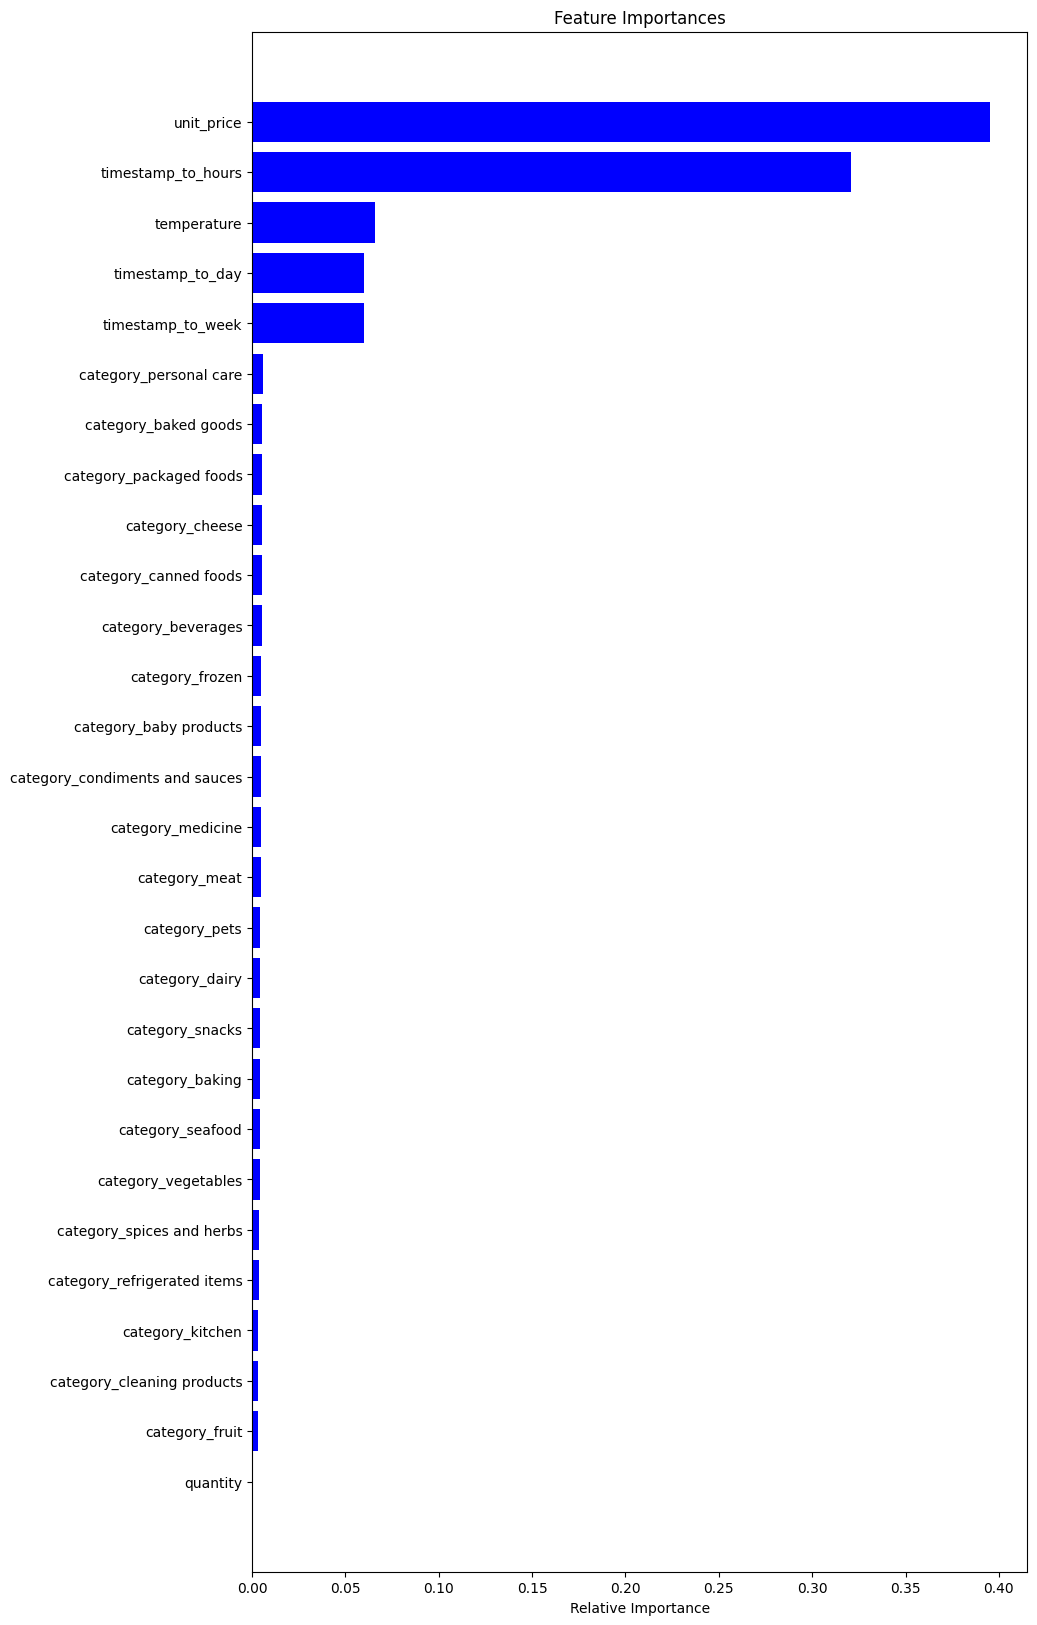

In [342]:
features = [i.split("__")[0] for i in x.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

No kernel connected

No kernel connected